# EXPLORANDO O COMÉRCIO ELETRÔNICO BRASILEIRO: UM ESTUDO DOS PEDIDOS DA OLIST STORE

![](dataset-cover.png)

**INTRODUÇÃO**

Nesta análise, exploraremos um conjunto de dados público de comércio eletrônico brasileiro, composto por informações de 100 mil pedidos realizados na Olist Store entre 2016 e 2018. Esses dados oferecem uma visão abrangente dos pedidos, incluindo informações sobre status do pedido, preço, desempenho de pagamento, frete, localização do cliente, atributos do produto e avaliações dos clientes. A Olist é uma plataforma que conecta pequenas empresas a canais de venda e parceiros logísticos, facilitando as operações de comércio eletrônico em todo o Brasil.

Para ter acesso à base de dados, acesse: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

-----------------------------------------------------------------------------------------------------------------

**COLETA DOS DADOS**

A base de dados da Olist é composta por 9 tabelas diferentes, cada uma fornecendo informações específicas, incluindo:

- Dados sobre os pedidos (olist_orders_dataset)
- Detalhes dos itens dos pedidos (olist_order_items_dataset)
- Avaliações dos usuários em relação aos pedidos (olist_order_reviews_dataset)
- Informações de pagamento dos pedidos (olist_order_payments_dataset)
- Perfil dos consumidores que fizeram os pedidos (olist_customers_dataset)
- Dados de geolocalização dos consumidores (olist_geolocation_dataset)
- Informações detalhadas sobre os produtos (olist_products_dataset)
- Perfil dos vendedores (olist_sellers_dataset)

Para esta análise, concentraremos nosso estudo em três desses conjuntos de dados: o conjunto de dados que registra as *avaliações dos usuários sobre os pedidos* (olist_order_reviews_dataset), o conjunto de dados que descreve os *detalhes dos produtos* (olist_products_dataset) e o conjunto de dados que apresenta os *detalhes dos vendedores* (olist_sellers_dataset).

---------------------------------------------------------------------------------------------------------------

**PRINCIPAIS OBJETIVOS DESTA ANÁLISE:**

1. Entender a satisfação do cliente: Como os clientes avaliam sua experiência de compra na Olist Store?
2. Explorar as características dos produtos: Qual é a distribuição das características dos produtos vendidos na plataforma?
3. Analisar a geolocalização dos vendedores: Onde estão localizados os vendedores e como isso afeta o comércio na plataforma?

-----------------------------------------------------------------------------------------------------------------

**PROCESSAMENTO DOS DADOS**

Importando das bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos arquivos CSV

In [4]:
avaliacoes_pedidos = pd.read_csv('dt_olist/olist_order_reviews_dataset.csv')
produtos = pd.read_csv('dt_olist/olist_products_dataset.csv')
vendedores = pd.read_csv('dt_olist/olist_sellers_dataset.csv')

Dicionários de tradução para as colunas

In [5]:
traducao_avaliacoes = {
    'review_id': 'ID_Avaliacao',
    'order_id': 'ID_Pedido',
    'review_score': 'Pontuacao_Avaliacao',
    'review_comment_title': 'Titulo_Avaliacao',
    'review_comment_message': 'Mensagem_Avaliacao',
    'review_creation_date': 'Data_Criacao_Avaliacao',
    'review_answer_timestamp': 'Data_Resposta_Avaliacao'
}

traducao_produtos = {
    'product_id': 'ID_Produto',
    'product_category_name': 'Categoria_Produto',
    'product_name_lenght': 'Comprimento_Nome_Produto',
    'product_description_lenght': 'Comprimento_Descricao_Produto',
    'product_photos_qty': 'Quantidade_Fotos_Produto',
    'product_weight_g': 'Peso_Produto_gramas',
    'product_length_cm': 'Comprimento_Produto_cm',
    'product_height_cm': 'Altura_Produto_cm',
    'product_width_cm': 'Largura_Produto_cm'
}

traducao_vendedores = {
    'seller_id': 'ID_Vendedor',
    'seller_zip_code_prefix': 'CEP_Vendedor',
    'seller_city': 'Cidade_Vendedor',
    'seller_state': 'Estado_Vendedor'
}

# Renomear as colunas com os nomes traduzidos
avaliacoes_pedidos.rename(columns=traducao_avaliacoes, inplace=True)
produtos.rename(columns=traducao_produtos, inplace=True)
vendedores.rename(columns=traducao_vendedores, inplace=True)

Informações de cada CSV

In [12]:
avaliacoes_pedidos.info()
produtos.info()
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_Avaliacao             99224 non-null  object
 1   ID_Pedido                99224 non-null  object
 2   Pontuacao_Avaliacao      99224 non-null  int64 
 3   Titulo_Avaliacao         11568 non-null  object
 4   Mensagem_Avaliacao       40977 non-null  object
 5   Data_Criacao_Avaliacao   99224 non-null  object
 6   Data_Resposta_Avaliacao  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Produto                     32951 non-null  object 
 1   Categoria_Produto              32341 non-null  object 
 2   Comprimento_

---------------------------------------------------------------------------------------------------------------

*Limpeza e prepação dos dados para "avaliacoes_pedidos"*

Removendo as linhas com valores ausentes

In [13]:
avaliacoes_pedidos = avaliacoes_pedidos.dropna(subset=['Pontuacao_Avaliacao', 'Data_Criacao_Avaliacao'])

Convertendo a coluna para o tipo datetime

In [14]:
avaliacoes_pedidos['Data_Criacao_Avaliacao'] = pd.to_datetime(avaliacoes_pedidos['Data_Criacao_Avaliacao'])

Mapeando as classificações qualitativas

In [15]:
mapeamento_classificacao = {1: 'Péssimo', 2: 'Ruim', 3: 'Bom', 4: 'Muito Bom', 5: 'Excelente'}
avaliacoes_pedidos['Classificacao_Qualitativa'] = avaliacoes_pedidos['Pontuacao_Avaliacao'].map(mapeamento_classificacao)

*Análise 1: Satisfação do cliente*

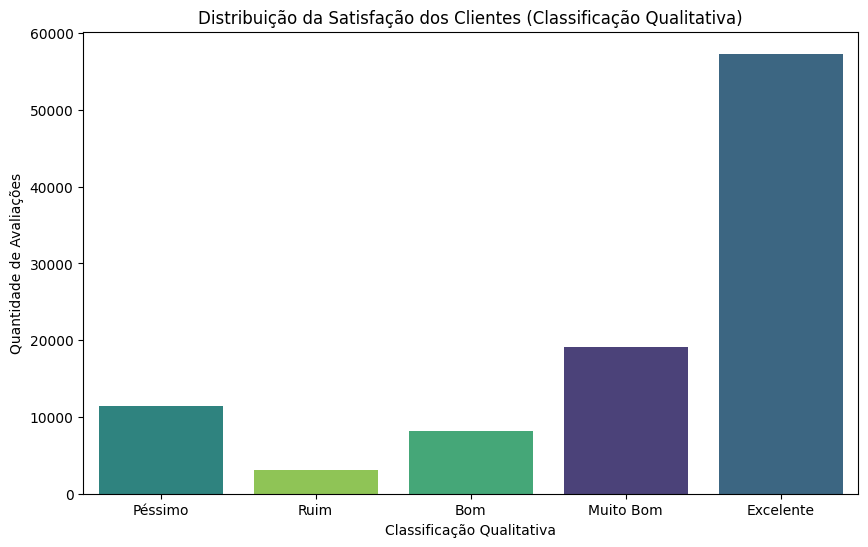

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=avaliacoes_pedidos, x='Classificacao_Qualitativa', hue='Classificacao_Qualitativa', palette='viridis', legend=False,
              order=['Péssimo', 'Ruim', 'Bom', 'Muito Bom', 'Excelente'])
plt.title('Distribuição da Satisfação dos Clientes (Classificação Qualitativa)')
plt.xlabel('Classificação Qualitativa')
plt.ylabel('Quantidade de Avaliações')
plt.show()

Aqui, analisamos a satisfação dos clientes com base em classificações qualitativas (de "Péssimo" a "Excelente"). O gráfico de barras mostra a distribuição das avaliações. Além disso, podemos criar uma nova coluna com a análise qualitativa, permitindo uma visualização mais informativa. Insights adicionais podem incluir a identificação de tendências na satisfação do cliente ao longo do tempo e a possível correlação com outras métricas, como o tempo de entrega por exemplo

---------------------------------------------------------------------------------------------------------------

*Limpeza e preparação dos dados para "produtos"*

In [17]:
produtos = produtos.dropna(subset=['Categoria_Produto', 'Comprimento_Nome_Produto', 'Quantidade_Fotos_Produto'])

*Análise 2: Distribuição das características dos produtos*

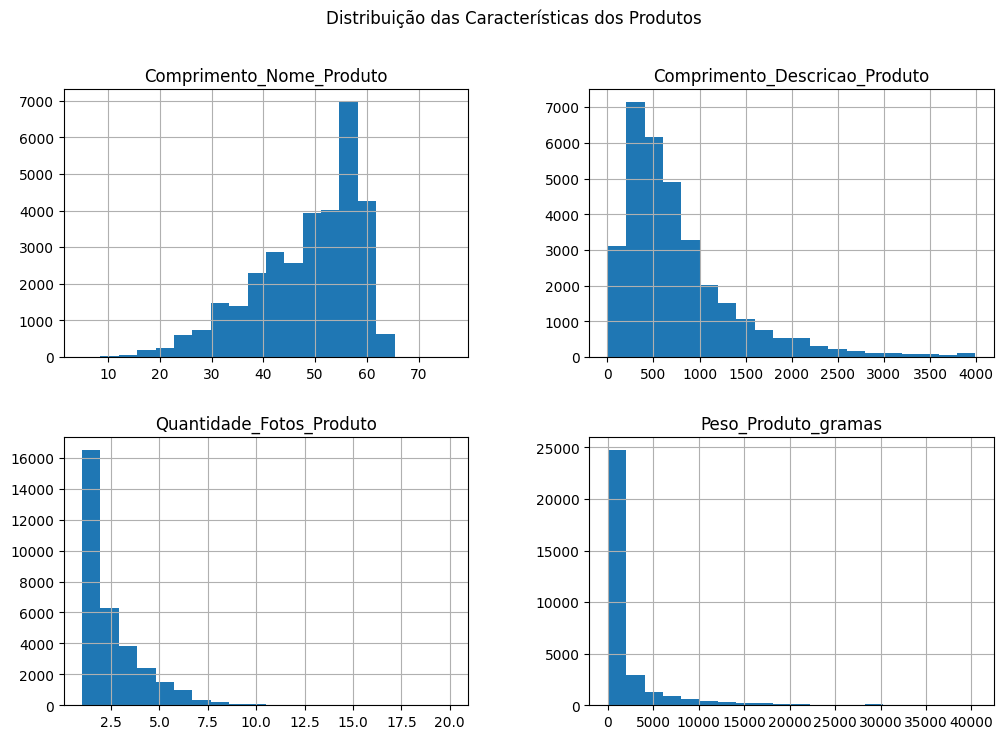

In [18]:
atributos_produto = [
    'Comprimento_Nome_Produto', 'Comprimento_Descricao_Produto',
    'Quantidade_Fotos_Produto', 'Peso_Produto_gramas'
]
produtos[atributos_produto].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribuição das Características dos Produtos')
plt.show()

Nesta análise, exploramos a distribuição de características dos produtos, como comprimento, largura, peso e quantidade de fotos. Os histogramas mostram como essas características estão distribuídas, fornecendo insights sobre o portfólio de produtos da Olist. Insights adicionais podem incluir a identificação de características comuns em produtos bem avaliados e a possível otimização do estoque com base na demanda por certos atributos.

----------------------------------------------------------------------------------------------------------------

*Limpeza e prepação dos dados para "vendedores"*

In [19]:
vendedores = vendedores.dropna(subset=['Cidade_Vendedor', 'Estado_Vendedor'])

*Análise 3: Localização dos vendedores*

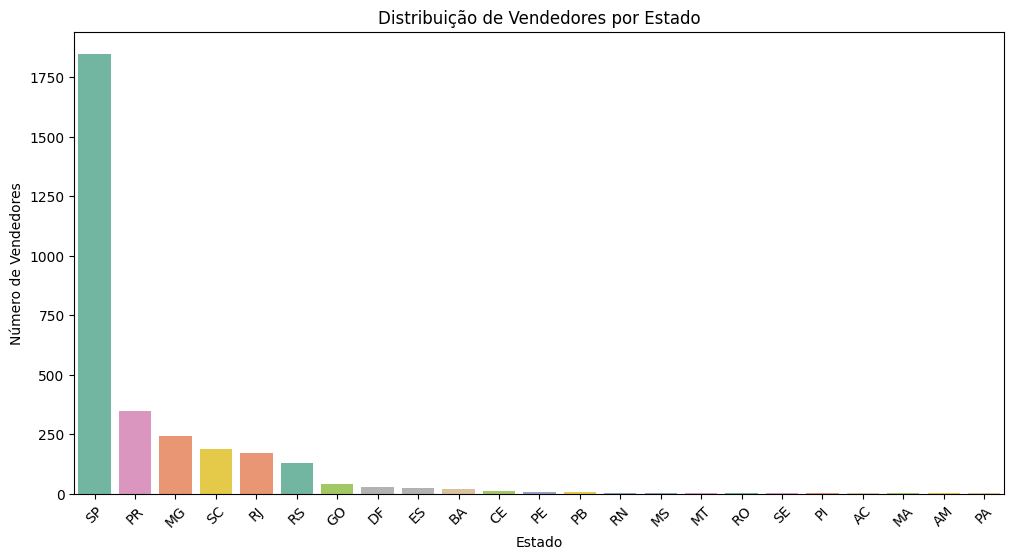

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=vendedores, x='Estado_Vendedor', hue='Estado_Vendedor', palette='Set2', legend=False,
              order=vendedores['Estado_Vendedor'].value_counts().index)
plt.title('Distribuição de Vendedores por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vendedores')
plt.xticks(rotation=45)
plt.show()

Esta análise se concentra na localização dos vendedores da Olist, destacando as cidades com o maior número de vendedores. O gráfico de barras revela as principais cidades, o que pode ser útil para estratégias de expansão ou alocação de recursos. Insights adicionais podem envolver a identificação de padrões de vendas em áreas geográficas específicas e o potencial para melhorias na logística.

----------------------------------------------------------------------------------------------------------------

*Combinando os Datasets*

Consultando as colunas para mesclar

In [25]:
print(avaliacoes_pedidos.columns)
print(produtos.columns)
print(vendedores.columns)

Index(['ID_Avaliacao', 'ID_Pedido', 'Pontuacao_Avaliacao', 'Titulo_Avaliacao',
       'Mensagem_Avaliacao', 'Data_Criacao_Avaliacao',
       'Data_Resposta_Avaliacao', 'Classificacao_Qualitativa'],
      dtype='object')
Index(['ID_Produto', 'Categoria_Produto', 'Comprimento_Nome_Produto',
       'Comprimento_Descricao_Produto', 'Quantidade_Fotos_Produto',
       'Peso_Produto_gramas', 'Comprimento_Produto_cm', 'Altura_Produto_cm',
       'Largura_Produto_cm'],
      dtype='object')
Index(['ID_Vendedor', 'CEP_Vendedor', 'Cidade_Vendedor', 'Estado_Vendedor'], dtype='object')


Meus datasets não tem coluna em comum para mesclar, cavei até o buraco negro para criar esse aqui
Não senti necessidade de mesclar eles para as análises, apesar de ter entendido como fazer
Então achei uma solução com MUITA pesquisa

In [36]:
# Criando uma coluna de chave única para cada DataFrame
avaliacoes_pedidos['Chave_Mesclagem'] = 0
produtos['Chave_Mesclagem'] = 0
vendedores['Chave_Mesclagem'] = 0

# Realizando as mesclagens sequencialmente
dataframes_to_merge = [avaliacoes_pedidos, produtos, vendedores]
base_dataframe = dataframes_to_merge[0]
for df in dataframes_to_merge[1:]:
    df['Chave_Mesclagem'] = 0
    base_dataframe['Chave_Mesclagem'] = range(len(base_dataframe))
    base_dataframe = pd.merge(base_dataframe, df, on='Chave_Mesclagem', how='inner')
    base_dataframe.drop(columns=['Chave_Mesclagem'], inplace=True)

# Exportando a base de dados final para um arquivo CSV
base_dataframe.to_csv('base_de_dados_final.csv', index=False)

--------------------------------------------------------------------------------------------------------------

**CONCLUSÃO**

Essas análises oferecem insights valiosos para a Olist, auxiliando na tomada de decisões estratégicas e no aprimoramento dos serviços prestados aos clientes e parceiros.

----------------------------------------------------------------------------------------------------------------

![](imagens-e-gifs-animados-de-aplausos-8.gif)